<a href="https://colab.research.google.com/github/tushar2411/Capstone-Project-2/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Project Title :- Sales Prediction : Predicting sales of a major store chain Rossmann</b>


---

---



## <b> Project Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


#**Following are the 7 major steps of building Machine Learning Model** :
##1.   Collecting Data.
##2.   Preparing the Data
* ###  Exploratory Data Analysis.
* ###  Feature engineering.

##3.   Choosing a Model
##4.   Training the Model.
##5.   Evaluating the Model.
##6.   Parameter Tuning.
##7.   Making Predictions.

##*First thing first importing the necessary libraries for EDA and Machine learning algorithim to train our model.*
##*Following are the libraries:-*

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




In [ ]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##*Now we are ready to mount the google drive using following code*


In [ ]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#**Step-1} Collecting Data**

##*After mounting the gdrive we are ready to load our dataset.*
we have two dataset.which is Rossmann Store data and Store data.In which we have diffrent store observations and its some information like sales store catagories etc.


In [ ]:
rossmann_df = pd.read_csv("/content/drive/MyDrive/Capstone Project-2 Sales Retail Prediction/Rossmann Stores Data.csv")

store_df = pd.read_csv("/content/drive/MyDrive/Capstone Project-2 Sales Retail Prediction/store.csv")

#**Step-2} Preparing The Data**

##*Let's Take a Look On Datas*

In [ ]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


##*Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.*

In [ ]:
rossmann_df.shape, store_df.shape

((1017209, 9), (1115, 10))

##The `rossmann_df` has `1017209` Rows and `9` Columns

## The `store_df` has `1115` Rows and `10` Columns

##*Using info() method we can easily get the idea of what kind of data type and null values inside our both dataframes we have.*

In [ ]:
#checking the info 
rossmann_df.info(), store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

(None, None)

##*as we can see that in our `rossmann_df` we have zero null values and in our `store_df` we have too many null values.*

###*geting the total sum of null values present in each columns in our `store_df` using `isnull()` function present in pandas library.*

In [ ]:
#calculating totall null values in our store dataframe

store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
# Calculating null values percentages present in Data
store_df.isnull().mean().round(4) * 100

Store                         0.00
StoreType                     0.00
Assortment                    0.00
CompetitionDistance           0.27
CompetitionOpenSinceMonth    31.75
CompetitionOpenSinceYear     31.75
Promo2                        0.00
Promo2SinceWeek              48.79
Promo2SinceYear              48.79
PromoInterval                48.79
dtype: float64

###*we can see that we have `6` columns in which we have null values. so we have to find correct way to fill these null values.*

We can see that in 3 columns `CompetitionDistance`, `CompetitionOpenSinceMonth`, `CompetitionOpenSinceYear` having less percentage of nulls. So we will fill these values by mode and median as per column requirements.

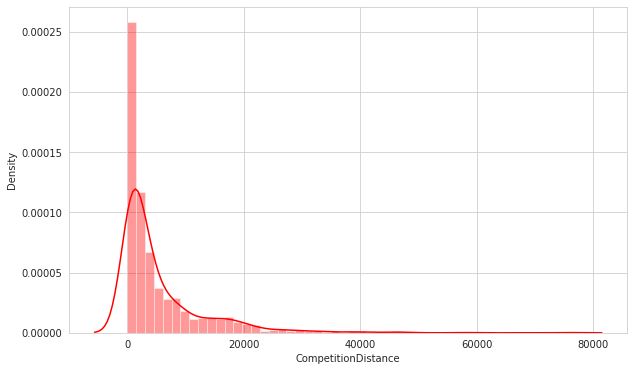

In [ ]:
#checking the disribution of CompetitionDistance column
plt.figure(figsize=(10,6))
sns.distplot(store_df['CompetitionDistance'], color = 'r')
plt.show()

###*as we can see that the distribution look like right skewed distribution. so we dicided to fill null values with median*

In [ ]:
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)

store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

We have simply filled these below 3 Columns by 0 

In [ ]:
store_df['Promo2SinceWeek'].fillna(0, inplace = True)

store_df['Promo2SinceYear'].fillna(0, inplace = True)

store_df['PromoInterval'].fillna(0, inplace = True)

In [ ]:
# Again Checking the Null Values

print(store_df.isnull().mean().round(4) * 100)

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64


###*As we can see that many columns having object datatype so we have to check the datatype of thses column because our machine learning algorithms only takes numberical values.*

###*first we have date column we have to separate the date, month and year from that.*

In [ ]:
rossmann_df["Date"]=pd.to_datetime(rossmann_df["Date"])
rossmann_df["Year"]=rossmann_df["Date"].dt.year
rossmann_df["Month"]=rossmann_df["Date"].dt.month
rossmann_df["Day"]=rossmann_df["Date"].dt.day
rossmann_df["Week"]=rossmann_df["Date"].dt.week%4
rossmann_df["WeekOfYear"]=rossmann_df["Date"].dt.week

In [ ]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31


###*Let's Check the description of the data in the DataFrame*

In [ ]:
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,1.509300e+00,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.113273e+00,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.000000e+00,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.000000e+00,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.000000e+00,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,3.000000e+00,5.200000e+01


In [ ]:
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,5396.614350,7.788341,2010.043946,0.512108,12.083408,1030.239462
std,322.01708,7654.513635,2.779130,5.500844,0.500078,15.542241,1006.038782
min,1.00000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,279.50000,720.000000,6.000000,2008.000000,0.000000,0.000000,0.000000
50%,558.00000,2325.000000,9.000000,2012.000000,1.000000,1.000000,2009.000000
75%,836.50000,6875.000000,9.000000,2013.000000,1.000000,22.000000,2012.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Let's Merge the `Rossmann_df` and `Store_df` by column '`Store`' as in both csv `Store` column is common.

In [ ]:
# Merging the Column

merge_df = pd.merge(rossmann_df, store_df, on = 'Store', how = 'outer')

merge_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [ ]:
merge_df.shape

(1017209, 23)

##Now we have `1017209` numner of rows and `18` columns.

In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

###*Making a copy of our processed dataset to prevent that if we mistakenly do some change via code like inplace = true.*

In [ ]:
final_df = merge_df.copy()

In [ ]:
final_df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
final_df['CompetitionOpen'] = 0
final_df['PromoOpen'] = 0

We Can identify that since when compition was open in number of years till current year

Same as well as for how many number of Promo2 are opened till date

In [ ]:
final_df['CompetitionOpen'] = (final_df['CompetitionOpen'].where(final_df['CompetitionOpenSinceYear'] == 0, other= (12 * (final_df['Year'] - final_df['CompetitionOpenSinceYear'])) + (final_df['Month'] - final_df['CompetitionOpenSinceMonth'])))
final_df['PromoOpen'] = ( 12 * (final_df['Year'] - final_df['Promo2SinceYear'])) + final_df['Month'] - ((final_df['Promo2SinceWeek']/4))

In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0


We will check if `PromoOpen` got any Negative Values

In [ ]:
final_df[final_df['PromoOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
17926,20,1,9229,954,1,1,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17927,20,7,0,0,0,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17928,20,6,5572,566,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17929,20,5,7149,839,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
17930,20,4,8118,997,1,0,0,0,2014,6,...,a,2340.0,5.0,2009.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct",61,-4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013436,1111,6,3325,291,1,0,0,0,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013437,1111,5,4640,453,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013438,1111,4,4579,444,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75
1013439,1111,3,5097,505,1,0,0,1,2013,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",-17,-6.75


##*we can make these PromoOpen negative values to zeros, because they have not started the promos at that time*


In [ ]:
final_df.loc[final_df['PromoOpen'] < 0, 'PromoOpen'] = 0

In [ ]:
final_df[final_df['PromoOpen'] < 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


##*we can also make these CompetitionOpen negative values to zeros, because they have not opened the competition at that time*


In [ ]:
final_df.loc[final_df['CompetitionOpen']<0, 'CompetitionOpen'] = 0

In [ ]:
final_df[final_df['CompetitionOpen'] < 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0


In [ ]:
final_df['PromoOpen'].value_counts()

0.0        70285
24187.0    16864
24173.0    16864
24159.0    16864
24161.0    16864
           ...  
56.0          31
49.0          31
48.0          31
46.0          31
47.0          30
Name: PromoOpen, Length: 293, dtype: int64

In [ ]:
final_df['PromoOpen'].max()

24187.0

In [ ]:
final_df['PromoOpen'].min()

0.0

###*some negative and some huge values are there*
###*first I will convert the values to zero in PromoOpen which is having Promo2 = 0, because they have not started any promo so no open promo.*

In [ ]:
final_df[final_df['Promo'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
6,1,6,4364,500,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
7,1,5,3706,459,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
8,1,4,3769,503,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
9,1,3,3464,463,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,24187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,7.5


In [ ]:
final_df.loc[final_df['Promo'] == 0, 'PromoOpen'] = 0

In [ ]:
final_df[final_df['Promo'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
6,1,6,4364,500,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
7,1,5,3706,459,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
8,1,4,3769,503,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
9,1,3,3464,463,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0.0
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0.0
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0.0
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0.0


###*now we can remove the `CompetitionOpenSinceMonth`	`CompetitionOpenSinceYear`	`Promo2`	`Promo2SinceWeek`	`Promo2SinceYear`*

In [ ]:
final_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'], axis = 1, inplace = True)

In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,31,3,31,c,a,1270.0,0,82,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,30,3,31,c,a,1270.0,0,82,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,29,3,31,c,a,1270.0,0,82,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,28,3,31,c,a,1270.0,0,82,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,27,3,31,c,a,1270.0,0,82,24187.0


In [ ]:
final_df.shape

(1017209, 19)

In [ ]:
#calculation value counts using value_counts() funtion
final_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
final_df.loc[final_df['StateHoliday'] == '0', 'StateHoliday'] = 0

final_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

###*So as we have catagorical values in `StateHoliday` so we can do One Hot Encoding by using pandas `pd.get_dummies` to create dummy variables.*

In [ ]:
final_df = pd.get_dummies(final_df, columns = ['StateHoliday'], drop_first = True)

###*Now in `Assortment` column we have to levelized the catagorical value in a form of `0,1,2` which it will give some weightage to model predictions.*

In [ ]:
final_df['Assortment'].value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [ ]:
final_df['Assortment'] = np.where((final_df['Assortment'] == 'a'),0,final_df['Assortment'])

final_df['Assortment'] = np.where((final_df['Assortment'] == 'b'), 1, final_df['Assortment'])

final_df['Assortment'] = np.where((final_df['Assortment'] == 'c'), 2, final_df['Assortment'])

###Now in `StoreType` we did not use One hot encoding because if we done OHE encoding which give equal weightage to our model. so as per domain knowledge we can labeled as 0,1,2,3 as store type.


*   store_type 0 means small store_type.
*   store_type 1 means medium store_type.

*   store_type 2 means large store_type.
*   store_type 3 means huge store_type.

In [ ]:
final_df['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [ ]:
#converting catagorical value into interger values based on store type class.

final_df['StoreType'] = np.where((final_df['StoreType'] == 'a'), 0, final_df['StoreType'])

final_df['StoreType'] = np.where((final_df['StoreType'] == 'b'), 1, final_df['StoreType'])

final_df['StoreType'] = np.where((final_df['StoreType'] == 'c'), 2, final_df['StoreType'])

final_df['StoreType'] = np.where((final_df['StoreType'] == 'd'), 3, final_df['StoreType'])

In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,5263,555,1,1,1,2015,7,31,...,31,2,0,1270.0,0,82,24187.0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,31,2,0,1270.0,0,82,24187.0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,31,2,0,1270.0,0,82,24187.0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,31,2,0,1270.0,0,82,24187.0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,31,2,0,1270.0,0,82,24187.0,0,0,0


In [ ]:
final_df['PromoInterval'].value_counts

<bound method IndexOpsMixin.value_counts of 0                         0
1                         0
2                         0
3                         0
4                         0
                 ...       
1017204    Mar,Jun,Sept,Dec
1017205    Mar,Jun,Sept,Dec
1017206    Mar,Jun,Sept,Dec
1017207    Mar,Jun,Sept,Dec
1017208    Mar,Jun,Sept,Dec
Name: PromoInterval, Length: 1017209, dtype: object>

We can see above in `PromoInterval` column there are also some categorial values we need to give them One Hot Encoding

In [ ]:
final_df = pd.get_dummies(final_df, columns = ['PromoInterval'], drop_first = True)

In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,Assortment,CompetitionDistance,CompetitionOpen,PromoOpen,StateHoliday_a,StateHoliday_b,StateHoliday_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,2015,7,31,...,0,1270.0,82,24187.0,0,0,0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,0,1270.0,82,24187.0,0,0,0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,0,1270.0,82,24187.0,0,0,0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,0,1270.0,82,24187.0,0,0,0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,0,1270.0,82,24187.0,0,0,0,0,0,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  int64  
 3   Customers                       1017209 non-null  int64  
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  Week                            1017209 non-null  int64  
 11  WeekOfYear                      1017209 non-null  int64  
 12  

###As we can see that some of our features are in object datatype so we have to first convert into interger or float. so that our machine learning algorithm will understand these feature.

In [ ]:
#converting object dtype to integer.

final_df['StoreType']= final_df['StoreType'].astype(int)

final_df['Assortment']= final_df['Assortment'].astype(int)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  int64  
 3   Customers                       1017209 non-null  int64  
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   SchoolHoliday                   1017209 non-null  int64  
 7   Year                            1017209 non-null  int64  
 8   Month                           1017209 non-null  int64  
 9   Day                             1017209 non-null  int64  
 10  Week                            1017209 non-null  int64  
 11  WeekOfYear                      1017209 non-null  int64  
 12  

In [ ]:
# Checking Duplicate Values
value=len(final_df[final_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


#**EXPLORATORY DATA ANALYSIS**

---



In [ ]:
final_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,Assortment,CompetitionDistance,CompetitionOpen,PromoOpen,StateHoliday_a,StateHoliday_b,StateHoliday_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,2015,7,31,...,0,1270.0,82,24187.0,0,0,0,0,0,0
1,1,4,5020,546,1,1,1,2015,7,30,...,0,1270.0,82,24187.0,0,0,0,0,0,0
2,1,3,4782,523,1,1,1,2015,7,29,...,0,1270.0,82,24187.0,0,0,0,0,0,0
3,1,2,5011,560,1,1,1,2015,7,28,...,0,1270.0,82,24187.0,0,0,0,0,0,0
4,1,1,6102,612,1,1,1,2015,7,27,...,0,1270.0,82,24187.0,0,0,0,0,0,0


In [ ]:
final_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'Week', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
       'PromoOpen', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

### Here we Know that our Target Variable is `Sales` So will visualize it how it can help us out through.

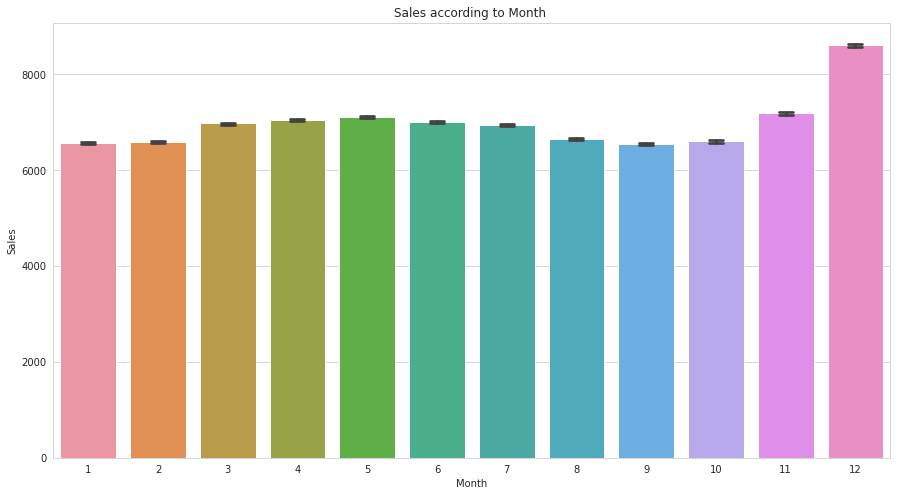

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='Month',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Month ')
plt.show()

###In the above chart The sales in the month of December is high beacuse of winter holidays and Christmas festival and also new year so. Lots of stores start many offers on some products so people will more buy discounted items.

## Sales over week

Text(0.5, 1.0, 'Sales Over Weeks')

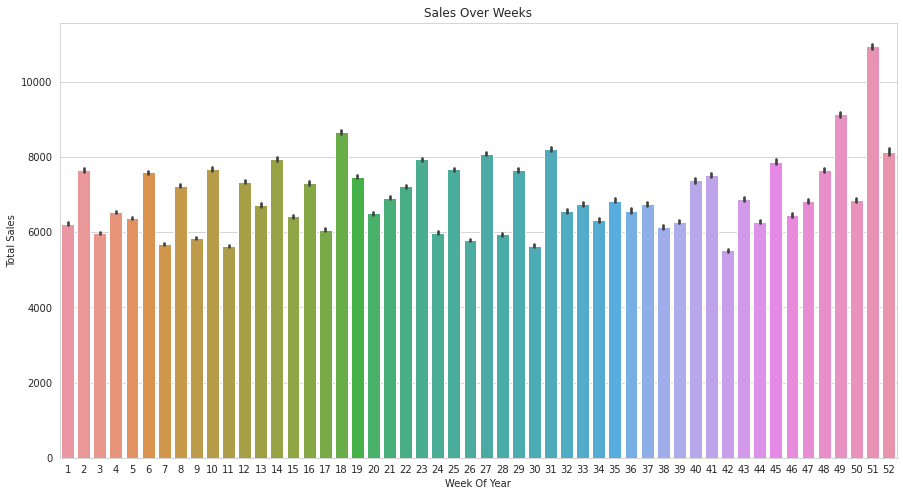

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=final_df['WeekOfYear'],y=final_df['Sales'],data=final_df)
plt.xlabel('Week Of Year')
plt.ylabel('Total Sales')
plt.title('Sales Over Weeks')

Here we can see that in every year there week of 45 to 52 having with highest Sales. Because at the end of the year sales always gets High.

## Sales Distribution

In [ ]:

# remove this part of data to avoid bias
final_df = final_df[final_df.Sales != 0]

In [ ]:
{"Mean":np.mean(final_df.Sales),"Median":np.median(final_df.Sales)}


{'Mean': 6955.959133664481, 'Median': 6369.0}

Text(0.5, 1.0, 'Sales Distribution')

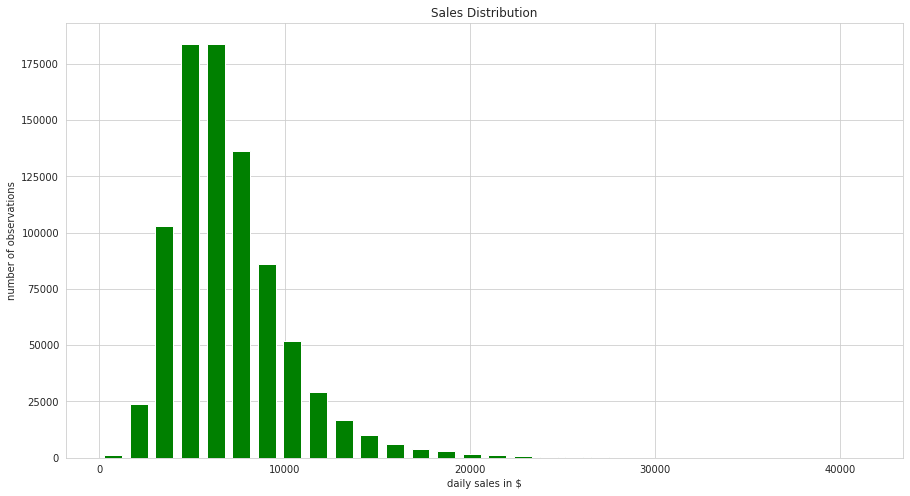

In [ ]:

plt.figure(figsize=(15,8))
plt.hist(x=final_df.Sales, bins=30,color = "green",rwidth=0.7)
plt.ylabel('number of observations')
plt.xlabel('daily sales in $')
plt.title('Sales Distribution')

###*The amount in $ on daily basis based on sales and no of observations made*

## Customer Distribution

In [ ]:
final_df['Year'].value_counts()

2013    337924
2014    310385
2015    196029
Name: Year, dtype: int64

In [ ]:
{"Mean":np.mean(final_df.Customers),"Median":np.median(final_df.Customers)}

{'Mean': 762.777166253325, 'Median': 676.0}

Text(0.5, 1.0, 'Customer Distribution')

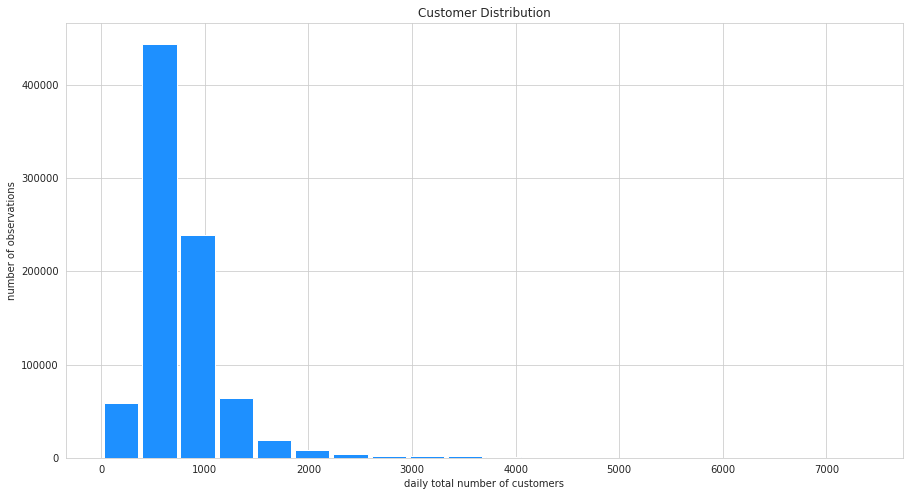

In [ ]:

plt.figure(figsize=(15,8))

plt.hist(x=final_df.Customers , bins=20,color = "dodgerblue", rwidth=0.9)

plt.ylabel('number of observations')

plt.xlabel('daily total number of customers')

plt.title('Customer Distribution')


## Sales over a Years

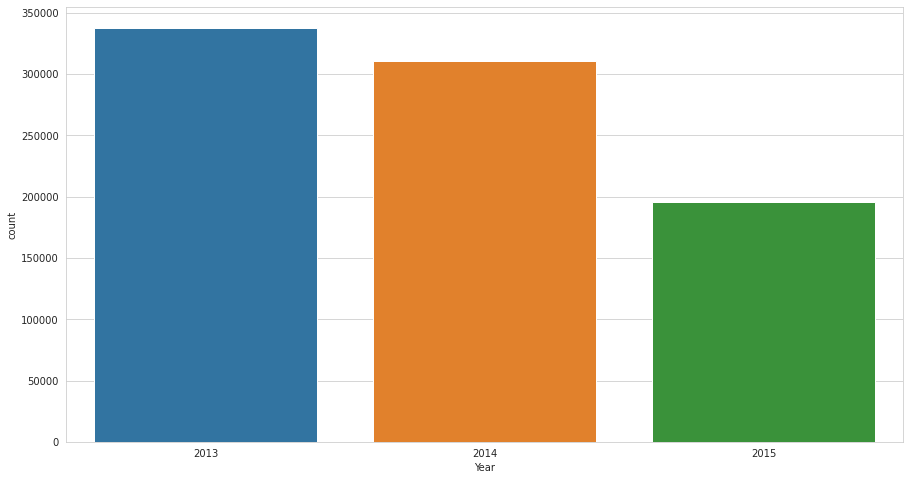

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))

sns.countplot(final_df['Year'], ax =ax)

###In this chart of sales according to years shows that in `2013` have the highest sales through out the year but in `2015` there is slightly low sales. 

## Sales by store type

Text(0.5, 1.0, 'Sales By Store Type')

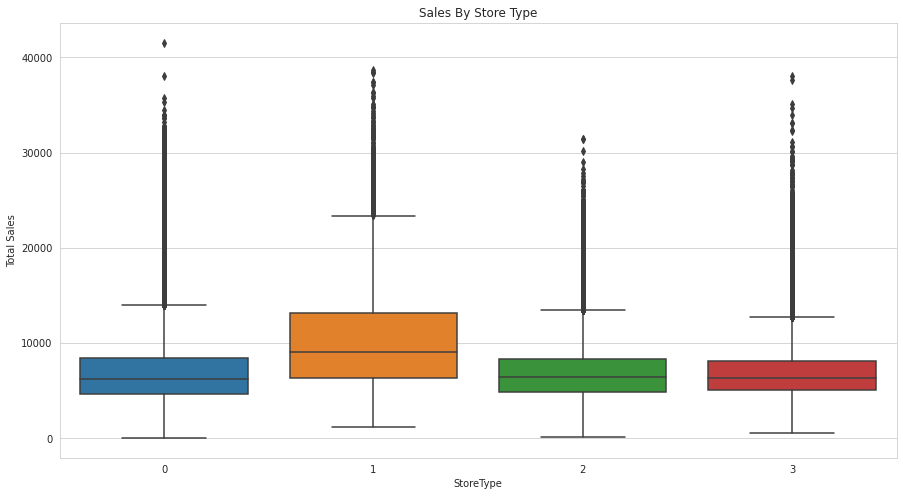

In [ ]:
# StoreType - differentiates between 4 different store models: a, b, c, d
plt.figure(figsize=(15,8))
sns.boxplot(x=final_df.StoreType, y=final_df.Sales, data=final_df)
plt.ylabel('Total Sales')
plt.title('Sales By Store Type')


###In the above chart The sales in the store type 1 have higher sales as compare to other store catagory. the rest of store having almost same sales.

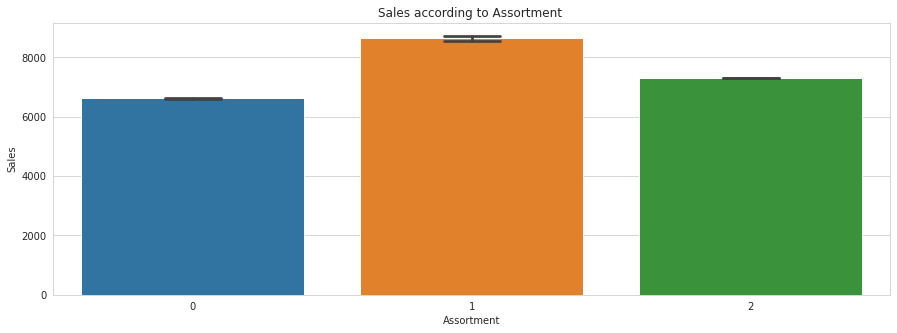

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(data=final_df,x='Assortment',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Assortment ')
plt.show()

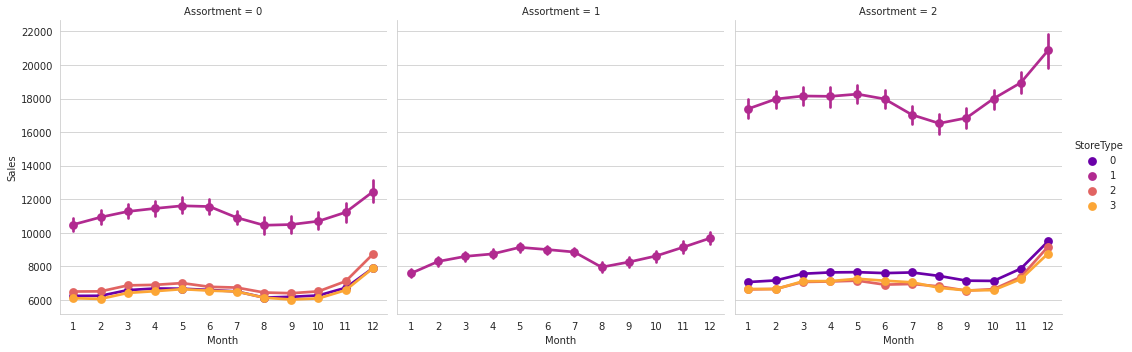

In [ ]:
sns.factorplot(data = final_df, x = 'Month', y = "Sales", 
               col = 'Assortment',
               palette = 'plasma',
               hue = 'StoreType')

### In the above chart The sales in which product assortment type 1 have higher sales as compare to other assortment catagory. the rest of assortment having almost same sales.

## Sales Over SchoolHoliday

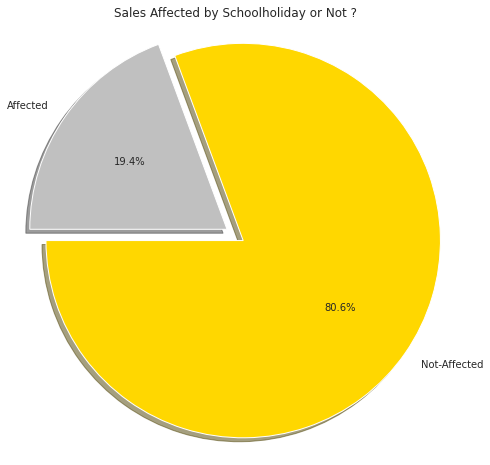

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = final_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

## Sale of Store over the Weekends

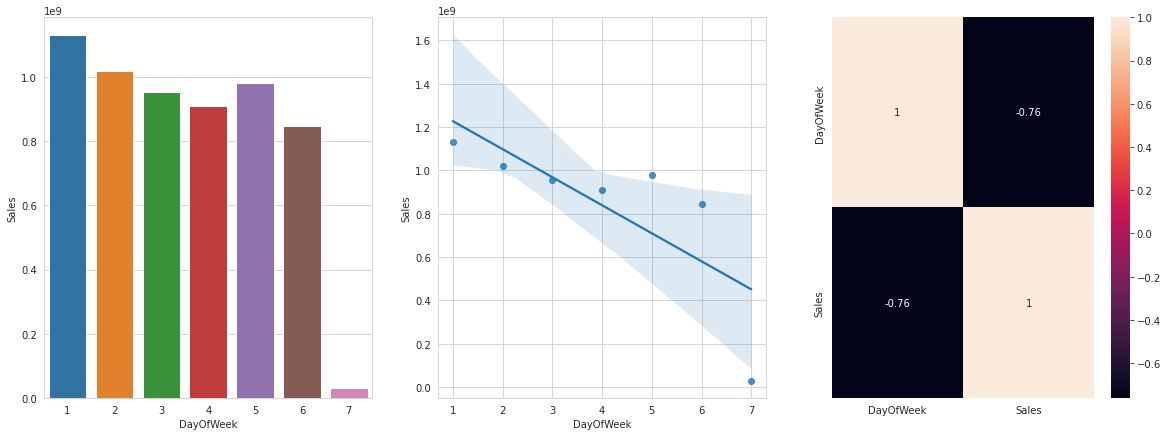

In [ ]:
plt.figure(figsize=(20,7))
aux1 = final_df[['DayOfWeek','Sales']].groupby('DayOfWeek').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x = 'DayOfWeek',y = 'Sales', data = aux1)

plt.subplot(1,3,2)
sns.regplot(x = 'DayOfWeek',y = 'Sales', data = aux1)

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method = 'pearson'), annot = True)

### Here We can See that `Stores` sell less on weekends.

##As we can see that our target variable '`Sales`' look like normal distribution. 

###*Now check the distribution of our each features*

In [ ]:

numeric_feature = ['Sales', 'Customers', 'CompetitionDistance','CompetitionOpen', 'PromoOpen','SchoolHoliday','StoreType','Assortment','Year']

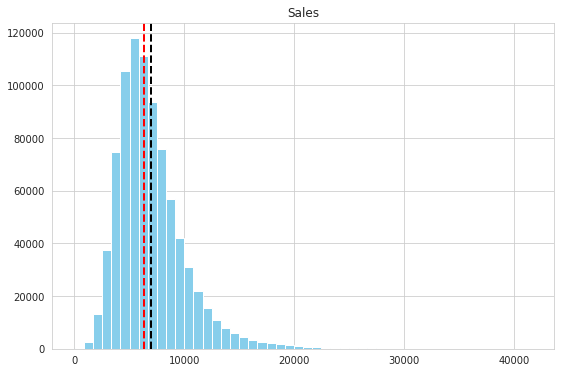

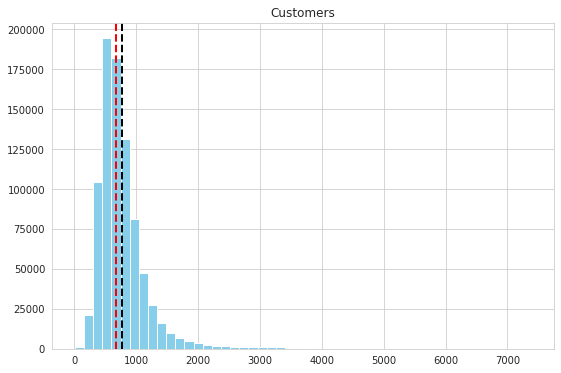

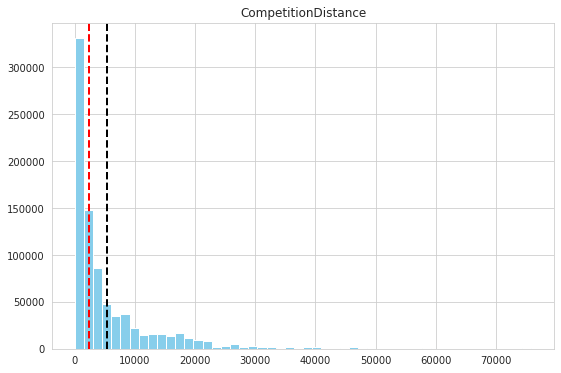

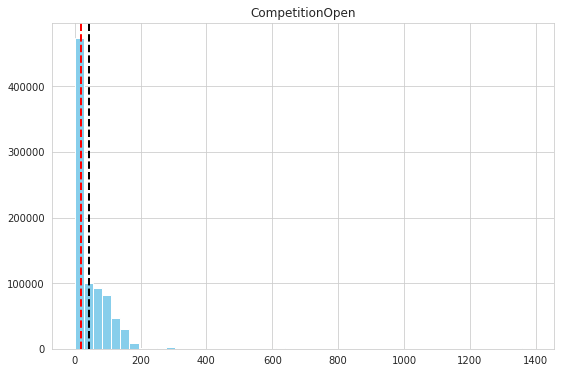

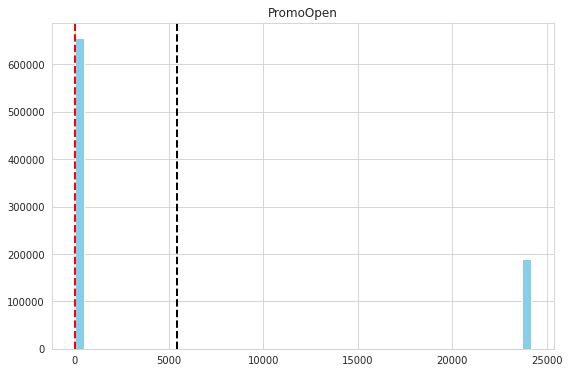

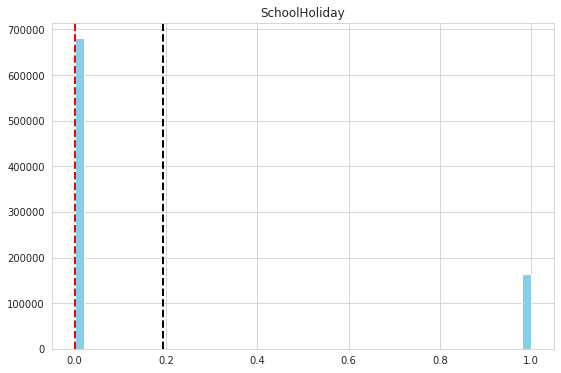

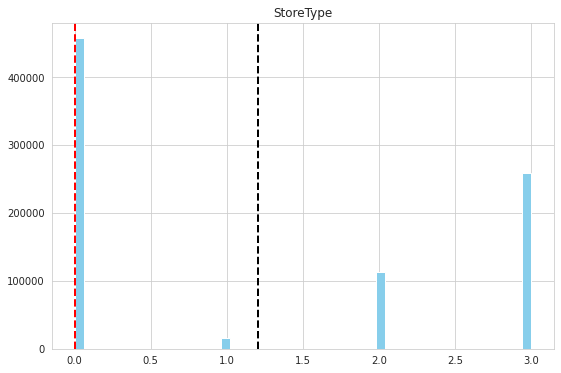

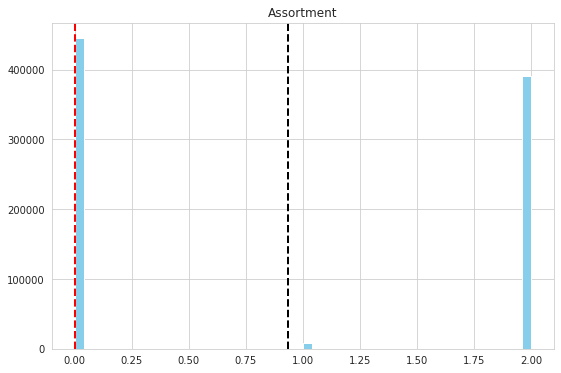

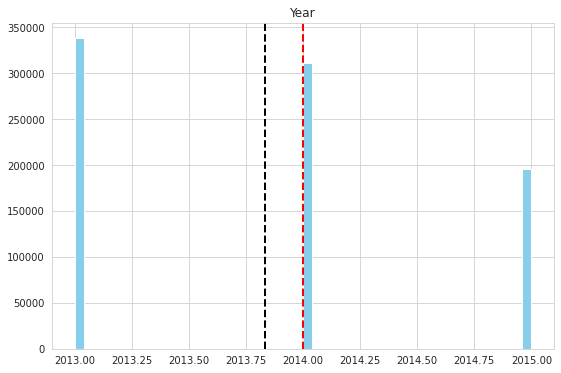

In [ ]:
for col in numeric_feature:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  final_df[col].hist(bins=50, ax = ax, color = 'skyblue')
  ax.axvline(final_df[col].mean(), color = 'black',linestyle='dashed', linewidth=2)
  ax.axvline(final_df[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)

###In the above charts we see that many features has catogorical value so its more look like skewed chart and rest of the feature also not normaly distributed. So by using log1p transformation we are able to make our distribution more closer to look like normal distribution.


In [ ]:
final_df['Sales_sqrt'] = final_df['Sales'].map(lambda x : np.sqrt(x) if x != 0 else 0)

final_df['Customer_ln'] = final_df['Customers'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['CompetitionDistance_ln'] = final_df['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['CompetitionOpen_ln'] = final_df['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['PromoOpen_ln'] = final_df['PromoOpen'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['SchoolHoliday_ln'] = final_df['SchoolHoliday'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['StoreType_ln'] = final_df['StoreType'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['Assortment_ln'] = final_df['Assortment'].map(lambda x : np.log(x) if x != 0 else 0)

final_df['Year_ln'] = final_df['Year'].map(lambda x : np.log(x) if x != 0 else 0)


In [ ]:
numeric_feature_ln = ['Sales_sqrt', 'Customer_ln', 'CompetitionDistance_ln','CompetitionOpen_ln', 'PromoOpen_ln','SchoolHoliday_ln','StoreType_ln','Assortment_ln','Year_ln']

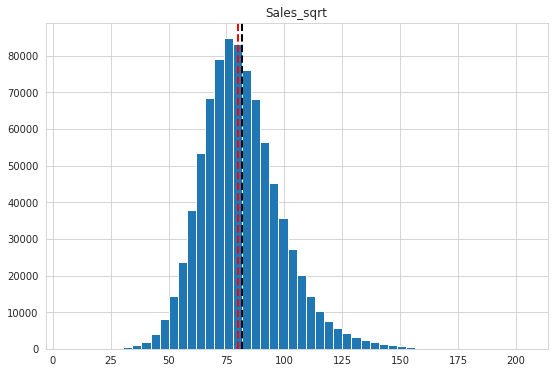

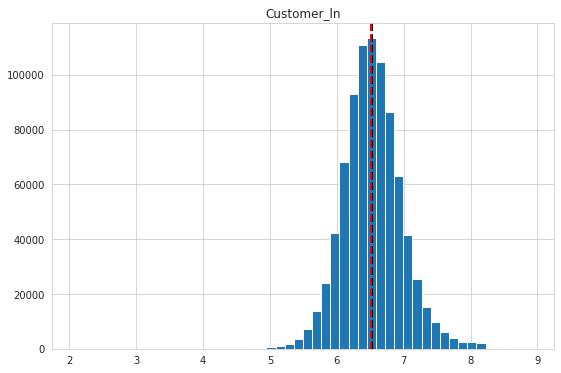

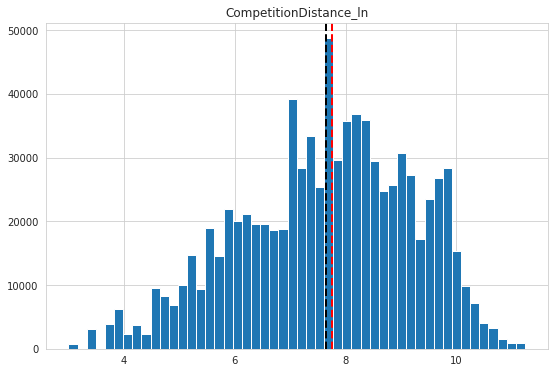

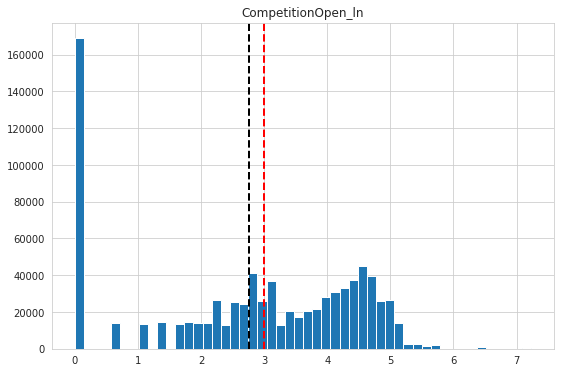

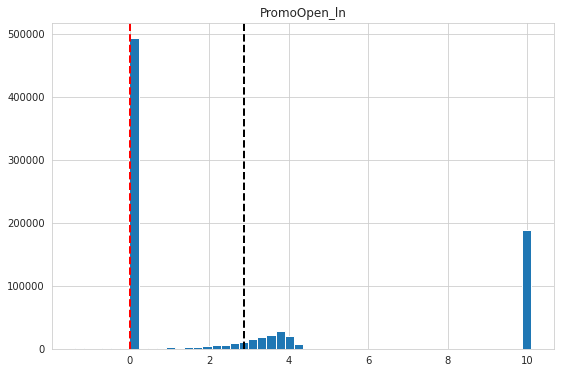

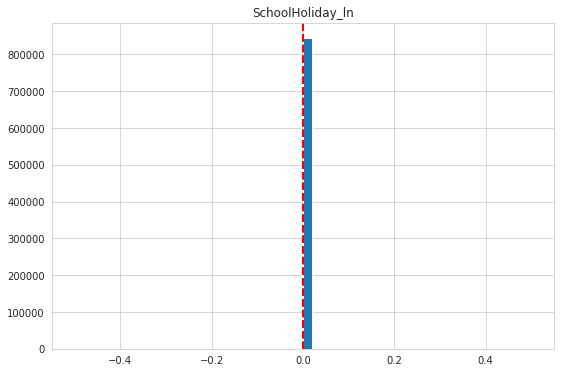

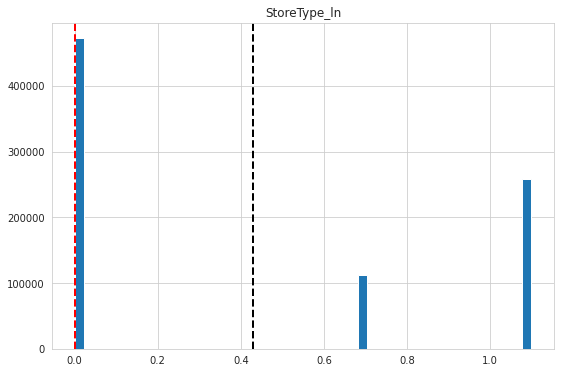

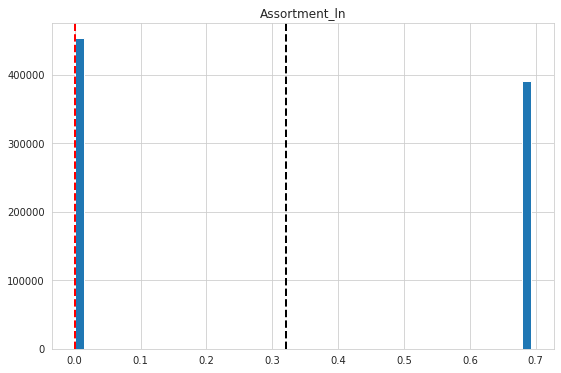

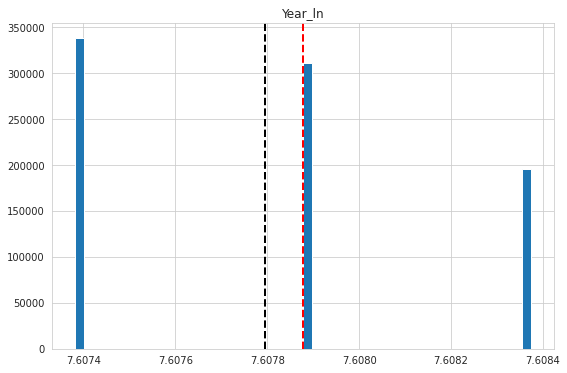

In [ ]:
for col in numeric_feature_ln:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  final_df[col].hist(bins=50, ax = ax)
  ax.axvline(final_df[col].mean(), color = 'black',linestyle='dashed', linewidth=2)
  ax.axvline(final_df[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)

###now we can see that some of our features like `CompititionDistance` now more look like normal distribution. rest of our feature still not normaly distributed some of feature has multi mode. beacuse of some features have catagorical values like 1,0.

In [ ]:
corr_df = final_df.copy()
corr_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,...,"PromoInterval_Mar,Jun,Sept,Dec",Sales_sqrt,Customer_ln,CompetitionDistance_ln,CompetitionOpen_ln,PromoOpen_ln,SchoolHoliday_ln,StoreType_ln,Assortment_ln,Year_ln
0,1,5,5263,555,1,1,1,2015,7,31,...,0,72.546537,6.318968,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374
1,1,4,5020,546,1,1,1,2015,7,30,...,0,70.851958,6.302619,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374
2,1,3,4782,523,1,1,1,2015,7,29,...,0,69.152006,6.259581,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374
3,1,2,5011,560,1,1,1,2015,7,28,...,0,70.788417,6.327937,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374
4,1,1,6102,612,1,1,1,2015,7,27,...,0,78.115299,6.416732,7.146772,4.406719,10.093571,0.0,0.693147,0.0,7.608374


In [ ]:
corr_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'Week', 'WeekOfYear',
       'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
       'PromoOpen', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Sales_sqrt', 'Customer_ln',
       'CompetitionDistance_ln', 'CompetitionOpen_ln', 'PromoOpen_ln',
       'SchoolHoliday_ln', 'StoreType_ln', 'Assortment_ln', 'Year_ln'],
      dtype='object')

In [ ]:
corr_df.drop(['PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'Sales_sqrt', 'Customer_ln',
       'CompetitionDistance_ln', 'CompetitionOpen_ln', 'PromoOpen_ln',
       'SchoolHoliday_ln', 'StoreType_ln', 'Assortment_ln', 'Year_ln','Open'], axis = 1, inplace = True)

KeyError: ignored

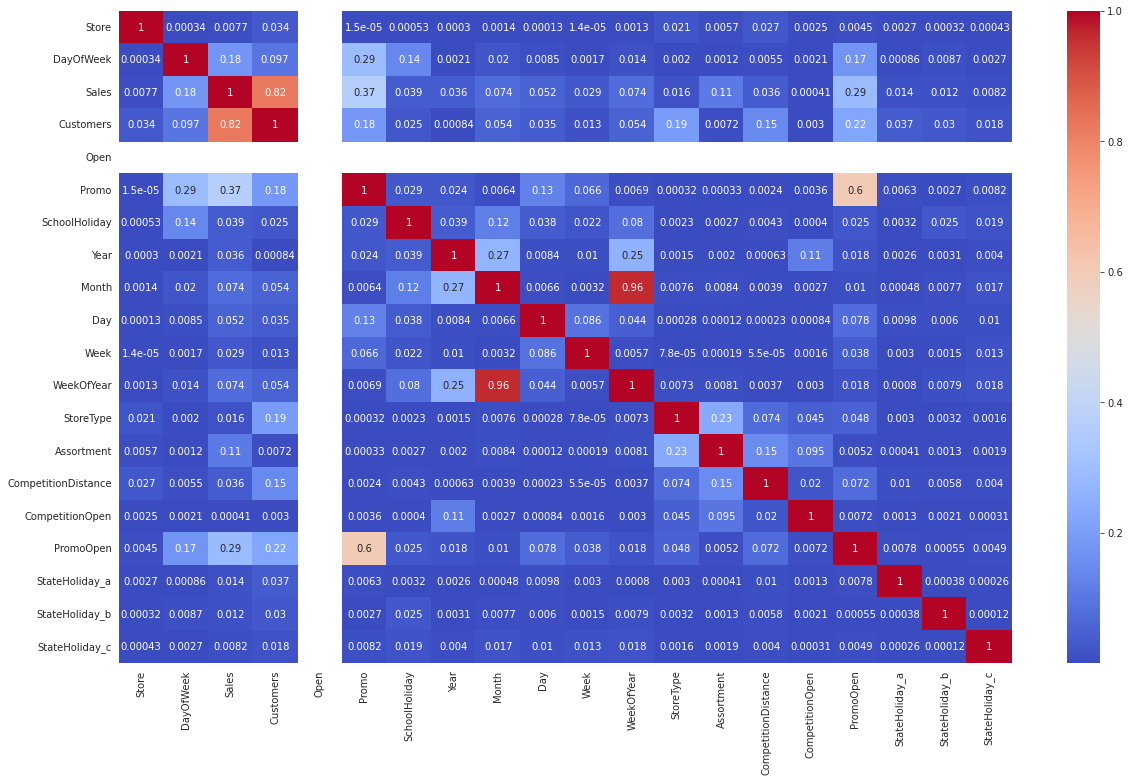

In [ ]:
## Correlation heatmap
plt.figure(figsize=(20,12))
correlation = corr_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlOrBr')
plt.show()